# 주제분석 3주차 패키지
## Chapter1. SVM

In [1]:
import pandas as pd
import numpy as np
import random
import os

In [2]:
def seed_everything(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [3]:
seed_everything(2728)

### 문제1. data1.csv항목을 불러와주세요

In [4]:
data1 = pd.read_csv('data\data1.csv')

### 문제2. target의 setosa를 0으로 versicolor를 1로로, virginica를 2로 바꾸어 주세요.

In [5]:
def refactor(data, column, value, change):
    data[column][data[column] == value] = change

In [6]:
refactor(data1, 'target', 'setosa', 0)
refactor(data1, 'target', 'versicolor', 1)
refactor(data1, 'target', 'virginica', 2)

C:\Users\위재성\AppData\Local\Temp/ipykernel_24632/432682092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column] == value] = change


In [7]:
data1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 문제3. Test셋과 Train셋를 나눠주세요. (Test셋의 비율은 0.3입니다)

In [8]:
from sklearn.model_selection import train_test_split

X = data1.iloc[:,:2]
y = data1['target'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2728)

### 문제4. SVM의 하이퍼 파라미터에 대해서 간단히 적어주세요.

`C`: 얼마나 많은 샘플이 잘못 분류될지 결정 = 마진의 넓이를 결정  
커질수록 허용오차 증가하므로 오버피팅 방지하나 편차는 증가,  
반대로 감소하면 오버피팅 가능성 증가하지만 편차는 감소  
  
`gamma`: 각 데이터 샘플의 영향력을 결정 = 결정경계(Decision Boundary)의 곡률을 결정  
커질수록 영향력 감소 = 결정경계가 구불구불해짐  
증감에 따른 오버피팅 가능성은 `C`와 동일

### 문제5. 하이퍼 파라 피터 튜닝을 해주세요. (서칭할 하이퍼 파라미터는 자유롭게 정하셔도 됩니다.)

In [9]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC(kernel = 'linear', random_state=2728)
param_grid = {'C': [0.01, 0.1, 1, 10, 30, 50, 70, 100]}

grid_search = GridSearchCV(svm, param_grid=param_grid, verbose=3, cv=5) 

In [10]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ............................C=0.01;, score=0.381 total time=   0.0s
[CV 2/5] END ............................C=0.01;, score=0.381 total time=   0.0s
[CV 3/5] END ............................C=0.01;, score=0.381 total time=   0.0s
[CV 4/5] END ............................C=0.01;, score=0.381 total time=   0.0s
[CV 5/5] END ............................C=0.01;, score=0.381 total time=   0.0s
[CV 1/5] END .............................C=0.1;, score=0.810 total time=   0.0s
[CV 2/5] END .............................C=0.1;, score=0.762 total time=   0.0s
[CV 3/5] END .............................C=0.1;, score=0.714 total time=   0.0s
[CV 4/5] END .............................C=0.1;, score=0.810 total time=   0.0s
[CV 5/5] END .............................C=0.1;, score=0.810 total time=   0.0s
[CV 1/5] END ...............................C=1;, score=0.857 total time=   0.0s
[CV 2/5] END ...............................C=1;,

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=2728),
             param_grid={'C': [0.01, 0.1, 1, 10, 30, 50, 70, 100]}, verbose=3)

### 문제6. 최적 파라미터 조합과 결과를 출력하세요.

In [11]:
grid_search.best_params_

{'C': 1}

In [12]:
grid_search.best_score_

0.819047619047619

### 문제7. 테스트셋을 예측한 뒤 결과를 출력하세요.

In [13]:
grid_search.predict(X_test)

array([0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1,
       0, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1,
       1])

In [14]:
grid_search.score(X_test,y_test)

0.7777777777777778

### 문제8. 다음과 같이 Deicision Boundary를 그려보세요.

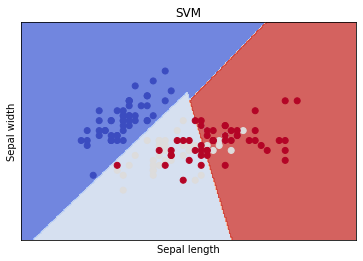

In [15]:
import matplotlib.pyplot as plt
h = .02
x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = grid_search.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)


plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('SVM')

plt.show()

## Chapter2. LGBM
### 문제1. data2.csv를 불러와주세요.

In [18]:
data2 = pd.read_csv('data\data2.csv')

In [19]:
data2

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 문제2. Test셋과 Train셋을 나눠주세요.

In [68]:
X = data2.iloc[:,1:]
y = data2['target'].astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2728)

In [21]:
data2

,target,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.526,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,3.585,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,3.521,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,3.413,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.422,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...,...
20635,0.781,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,0.771,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,0.923,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,0.847,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


### 문제3. LGBM 파라미터에 대해서 간단히 적어주세요.

`max_depth`: 트리의 최대깊이, 모델 과적합 방지에 사용, 깊어질수록 과적합 가능성 증가  
`min_child_samples`: 노드가 스플릿 될 때 노드에 들어갈 데이터의 최소 개수, 커질수록 트리높이는 감소  
`num_leaves`: 트리가 가지는 잎의 최대 개수, 커질수록 정확도 상승하지만 복잡도도 증가

### 문제4. LGBM 하이퍼 파라미터 튜닝을 해주세요.

In [69]:
param_grid = {'max_depth': [10,20],
             'min_child_samples': [20,40,60,80],
             'num_leaves': [60,70,80]}

In [72]:
import lightgbm as lgbm

lgb = lgbm.LGBMRegressor(random_state=2728)
grid_search = GridSearchCV(lgb, param_grid=param_grid, verbose=3, cv=5, scoring='neg_root_mean_squared_error') 

In [73]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END max_depth=10, min_child_samples=20, num_leaves=60;, score=-0.577 total time=   0.0s
[CV 2/5] END max_depth=10, min_child_samples=20, num_leaves=60;, score=-0.581 total time=   0.0s
[CV 3/5] END max_depth=10, min_child_samples=20, num_leaves=60;, score=-0.562 total time=   0.0s
[CV 4/5] END max_depth=10, min_child_samples=20, num_leaves=60;, score=-0.595 total time=   0.0s
[CV 5/5] END max_depth=10, min_child_samples=20, num_leaves=60;, score=-0.563 total time=   0.0s
[CV 1/5] END max_depth=10, min_child_samples=20, num_leaves=70;, score=-0.578 total time=   0.0s
[CV 2/5] END max_depth=10, min_child_samples=20, num_leaves=70;, score=-0.580 total time=   0.0s
[CV 3/5] END max_depth=10, min_child_samples=20, num_leaves=70;, score=-0.562 total time=   0.0s
[CV 4/5] END max_depth=10, min_child_samples=20, num_leaves=70;, score=-0.591 total time=   0.0s
[CV 5/5] END max_depth=10, min_child_samples=20, num_leaves=70;, 

[CV 1/5] END max_depth=20, min_child_samples=40, num_leaves=80;, score=-0.575 total time=   0.0s
[CV 2/5] END max_depth=20, min_child_samples=40, num_leaves=80;, score=-0.577 total time=   0.0s
[CV 3/5] END max_depth=20, min_child_samples=40, num_leaves=80;, score=-0.560 total time=   0.0s
[CV 4/5] END max_depth=20, min_child_samples=40, num_leaves=80;, score=-0.594 total time=   0.1s
[CV 5/5] END max_depth=20, min_child_samples=40, num_leaves=80;, score=-0.559 total time=   0.1s
[CV 1/5] END max_depth=20, min_child_samples=60, num_leaves=60;, score=-0.574 total time=   0.0s
[CV 2/5] END max_depth=20, min_child_samples=60, num_leaves=60;, score=-0.583 total time=   0.0s
[CV 3/5] END max_depth=20, min_child_samples=60, num_leaves=60;, score=-0.563 total time=   0.0s
[CV 4/5] END max_depth=20, min_child_samples=60, num_leaves=60;, score=-0.596 total time=   0.0s
[CV 5/5] END max_depth=20, min_child_samples=60, num_leaves=60;, score=-0.564 total time=   0.0s
[CV 1/5] END max_depth=20, min

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2728),
             param_grid={'max_depth': [10, 20],
                         'min_child_samples': [20, 40, 60, 80],
                         'num_leaves': [60, 70, 80]},
             scoring='neg_root_mean_squared_error', verbose=3)

### 문제5. 최적의 파라미터와 결과를 출력하세요.

In [74]:
grid_search.best_params_

{'max_depth': 20, 'min_child_samples': 20, 'num_leaves': 70}

In [75]:
-grid_search.best_score_

0.5719105860483396

### 문제7. 테스트셋을 예측한 뒤 결과를 출력하세요.

In [76]:
grid_search.predict(X_test)

array([0.90782302, 1.01016723, 1.98891128, ..., 1.14831756, 1.75685528,
       4.95140882])

In [77]:
-grid_search.score(X_test,y_test)

0.5647941259295253

## Chapter3. LSTM
### 문제1. Samsung.csv를 불러와주세요

In [29]:
data = pd.read_csv('data\Samsung.csv')

In [30]:
data = data.sort_values(by=['Date'], ascending=True) # 최근 60일 구하기 위해 정렬

In [31]:
data

,Date,Price,Open,High,Low,Vol.
0,2019-10-01,"48,850","48,900","49,100","48,650",6.20M
1,2019-10-02,"47,600","48,350","48,400","47,600",8.37M
2,2019-10-03,"47,600","47,600","47,600","47,600",-
3,2019-10-04,"48,000","47,400","48,650","47,350",8.46M
4,2019-10-06,"48,000","48,000","48,000","48,000",-
...,...,...,...,...,...,...
622,2021-10-26,"71,100","70,500","71,500","70,400",8.81K
623,2021-10-27,"70,100","71,000","71,000","70,000",3.67K
624,2021-10-28,"70,700","69,600","72,100","69,500",2.15K
625,2021-10-29,"69,800","71,200","71,600","69,700",16.50M


### 문제2. 데이터 형식을 확인해보고, 수치형으로 바꾸어 주세요.

In [32]:
data.dtypes

Date     object
Price    object
Open     object
High     object
Low      object
Vol.     object
dtype: object

In [33]:
def to_num(data):
    # 쉼표 삭제 후 수치형으로 변경
    num_data = data.replace('[^0-9]','',regex=True).apply(pd.to_numeric)
    return num_data

In [34]:
data = to_num(data.iloc[:,1:5])

In [35]:
data.dtypes

Price    int64
Open     int64
High     int64
Low      int64
dtype: object

### 문제3. 테스트 데이터를 분리해주세요. (테스트 데이터는 최근 60일입니다.)

In [36]:
train = data.iloc[:-60,:]
test = data.iloc[-60:,:]

In [37]:
train.head(3), test.head(3)

(   Price   Open   High    Low
 0  48850  48900  49100  48650
 1  47600  48350  48400  47600
 2  47600  47600  47600  47600,
      Price   Open   High    Low
 567  74200  74300  75100  74000
 568  73900  73900  74600  73100
 569  73100  73500  74400  73100)

### 문제 4. Train과 Test셋을 모두 스케일링 시켜주세요.

In [38]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
train_scale = scale.fit_transform(train)
test_scale = scale.transform(test)

### 문제5. Window사이즈에 맞게 Train과 테스트 셋을 구성해주세요. (아래의 그림을 참고하여 X와 y데이터를 구성해주세요; Window_size = 20)

In [39]:
def create_dataset(dataset, window_size):
    X=[];y=[]
    for i in range(len(dataset)-window_size):
        X.append(dataset[i:(i+window_size), 1:])
        y.append(dataset[i + window_size, 0])
    return(np.array(X),np.array(y))

In [40]:
window_size = 20

X_train, y_train = create_dataset(train_scale,window_size)
X_test, y_test = create_dataset(test_scale,window_size)

### 문제6. 문제5. LSTM 딥러닝 모델을 구성해주세요. ( Layer수, Unit수 등을 자유롭게 변형시켜보세요! )

In [58]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(10, activation = 'relu', input_shape=(X_train.shape[1],X_train.shape[2])))
model.add(Dense(5))
model.add(Dense(1))
 
model.summary()
 

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=16)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 0.1161
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0042
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 5/100
35/35 [==============================] - 0s 3ms/step -

35/35 [==============================] - 0s 3ms/step - loss: 7.7184e-04
Epoch 91/100
35/35 [==============================] - 0s 3ms/step - loss: 7.3152e-04
Epoch 92/100
35/35 [==============================] - 0s 3ms/step - loss: 7.1972e-04
Epoch 93/100
35/35 [==============================] - 0s 3ms/step - loss: 7.4476e-04
Epoch 94/100
35/35 [==============================] - 0s 3ms/step - loss: 7.3718e-04
Epoch 95/100
35/35 [==============================] - 0s 3ms/step - loss: 7.8696e-04
Epoch 96/100
35/35 [==============================] - 0s 3ms/step - loss: 7.5128e-04
Epoch 97/100
35/35 [==============================] - 0s 3ms/step - loss: 7.0579e-04
Epoch 98/100
35/35 [==============================] - 0s 3ms/step - loss: 7.2515e-04
Epoch 99/100
35/35 [==============================] - 0s 3ms/step - loss: 7.1995e-04
Epoch 100/100
35/35 [==============================] - 0s 3ms/step - loss: 7.5204e-04


### 문제7. 모델을 적합시킨 후 결과를 확인해보세요.

In [59]:
model.evaluate(X_train,y_train)

18/18 [==============================] - 0s 1ms/step - loss: 6.9956e-04


0.0006995559087954462

### 문제8. 테스트데이터에 대해서 예측 후 결과를 아래와 같이 시각화 해보세요.

In [60]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 2ms/step - loss: 3.6105e-04


0.00036104704486206174

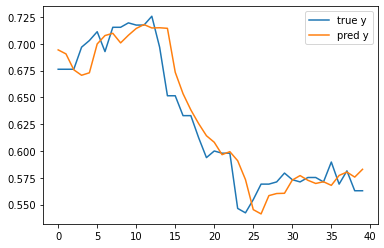

In [66]:
plt.plot(np.arange(len(y_test)), y_test)
plt.plot(np.arange(len(y_test)), model.predict(X_test))
plt.legend(['true y','pred y'])